# Zadanie 35

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
def plotProces(S, color = 'k'):
    N = list(range(len(S)))
    S.append(S[-1] + 1)
    N.append(N[-1])
    plt.scatter(S, N, s = 10, facecolors='none', edgecolors='k')
    # Wycinki wynikają z przesunięcia punktów oraz braku otwartego kółka na końcu.
    for i in range(len(S) - 1):
        x = [S[i], S[i+1]]
        y = [N[i], N[i]]
        plt.plot(x,y, color = color)
    plt.plot(S[-1], N[-1])

In [4]:
def procesOdnowy(T, f, args, N):
    """
    T - horyzont czasowy
    f - funkcja prawdopodobieństwa generująca czas oczekiwania
    argsF - argumenty do funkcji generującej czasy oczekiwania
    """
    toReturn = []
    for _ in range(N):
        S = []
        t = 0
        while t <= T:
            t += f(*args)
            if t>T:
                break
            S.append(t)
        toReturn.append(S)
    return toReturn

In [5]:
procesy = procesOdnowy(20, random.expovariate, (2,), 5)

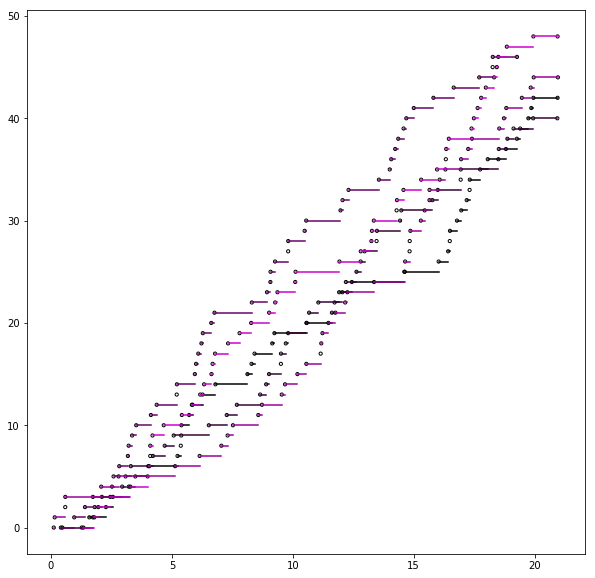

In [6]:
plt.figure(figsize = (10,10))
n = len(procesy)

for idx, proces in enumerate(procesy):
    plotProces(proces, color = (idx/n,0,idx/n))
plt.show()

# Zadanie 36

In [14]:
import numpy as np

In [30]:
def generujMt(T):
    jednorodnyPoisson = procesOdnowy(T, random.expovariate, (1/3,), 1)[0]
    jednorodnyU = procesOdnowy(T, random.uniform, (2,4), 1)[0]

    Poss = [(el, 1) for idx, el in enumerate(jednorodnyPoisson)]
    Jed = [(el, -1) for idx, el in enumerate(jednorodnyU)]
    M = Poss + Jed
    M.sort()

    OstateczneM = [(0,0)]
    for el, wart in M:
        OstateczneM.append((el, wart + OstateczneM[-1][1]))

    t = [el[0] for el in OstateczneM]
    N = [el[1] for el in OstateczneM]
    return t,N

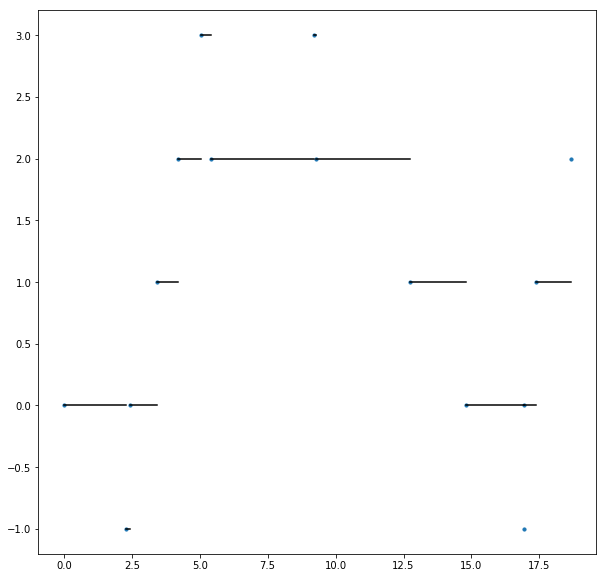

In [31]:
plt.figure(figsize = (10,10))
for _ in range(1):
    S, N = generujMt(20)
    plt.scatter(S, N, s = 10)
    for i in range(len(S) - 1):
        x = [S[i], S[i+1]]
        y = [N[i], N[i]]
        plt.plot(x,y, color = 'k')
plt.show()

Estymacja średniej $M_t$

In [32]:
n_symulacji = 1000
srednie = []
zakres = np.arange(1,20,0.5)

for t in zakres:
    score = 0
    for _ in range(n_symulacji):
        a = generujMt(t)
        score += a[1][-1] #ostatni skok
    srednie.append(score/n_symulacji)

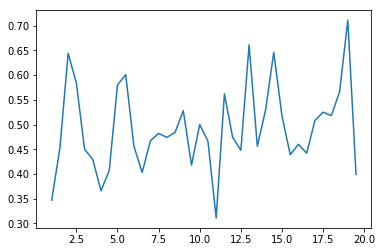

In [33]:
plt.plot(zakres, srednie)
plt.show()

In [34]:
count = 0
n_symulacji = 1000

for _ in range(n_symulacji):
    a = generujMt(100)
    if max(a[1])>10:
        count += 1

print(count/n_symulacji)

0.09


Histogram $M_{100}$

In [35]:
n_symulacji = 1000
score = []

for _ in range(n_symulacji):
    a = generujMt(100)
    score.append(a[1][-1]) #ostatni skok

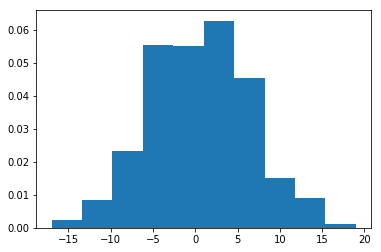

In [36]:
plt.hist(score, density = True)
plt.show()

# Zadanie 37

In [21]:
import math

In [22]:
def generujOdbityRuchBrowna(a,T,r):
    ilosc_krokow = math.ceil(T/r)
    B = [0]
    for _ in range(ilosc_krokow):
        B.append(B[-1] + math.sqrt(r)*random.gauss(0,1))
    Odbity = [-abs(el - a) + a for el in B]
    return B, Odbity

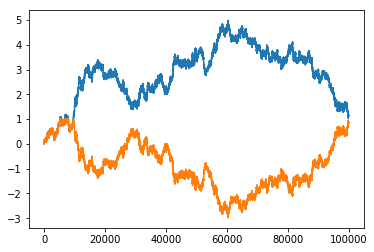

In [23]:
B,Odbity = generujOdbityRuchBrowna(1, 10, 10**(-4))
plt.plot(B)
plt.plot(Odbity)
plt.show()

# Zadanie 38

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def autokorelacja(data, tau):
    return np.sum(data[:-tau]*data[tau:])/(len(data) - tau)

In [9]:
dt = 10**(-3)
przyrostyBrowna = np.sqrt(dt)*np.random.randn(1000)

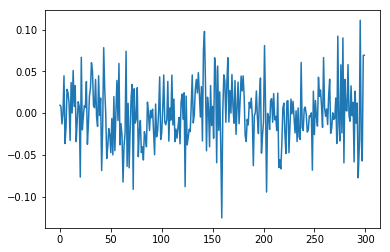

In [11]:
data = np.random.randn(1000)

N_MCS = 300
autocorrelation = []

for tau in range(1,301):
    score = 0
    for _ in range(N_MCS):
        score += autokorelacja(data, tau)
    autocorrelation.append(score/N_MCS)

plt.plot(autocorrelation)
plt.show()